<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.695092,28.716155,66.383743,23.541611,0.001996,213.338596,213.337112,0.001484
1,0.0,1.0,20.350393,62.287294,70.259982,50.444529,-0.000313,213.341885,213.342235,-0.000350
2,0.0,2.0,76.561302,96.805859,31.405448,40.736084,0.000067,255.508761,255.508654,0.000107
3,0.0,3.0,80.975921,26.254396,24.288490,87.749086,0.003292,229.271185,229.268799,0.002386
4,0.0,4.0,75.009547,70.290963,31.476107,47.655563,-0.000139,234.432042,234.432459,-0.000417
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,97.916028,74.491757,43.644272,48.826583,0.000072,274.878713,274.878414,0.000298
59996,999.0,56.0,92.067119,43.263773,99.039652,58.425781,0.000214,302.796539,302.796292,0.000247
59997,999.0,57.0,77.768621,48.200863,24.518839,64.217026,-0.000488,224.704860,224.704869,-0.000009
59998,999.0,58.0,90.921984,76.489208,88.502879,68.585615,-0.000103,334.499583,334.499743,-0.000160


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.695092,28.716155,66.383743,23.541611,0.001996,213.338596,213.337112,0.001484
1,0.0,1.0,20.350393,62.287294,70.259982,50.444529,-0.000313,213.341885,213.342235,-0.000350
2,0.0,2.0,76.561302,96.805859,31.405448,40.736084,0.000067,255.508761,255.508654,0.000107
3,0.0,3.0,80.975921,26.254396,24.288490,87.749086,0.003292,229.271185,229.268799,0.002386
4,0.0,4.0,75.009547,70.290963,31.476107,47.655563,-0.000139,234.432042,234.432459,-0.000417
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,97.916028,74.491757,43.644272,48.826583,0.000072,274.878713,274.878414,0.000298
59996,999.0,56.0,92.067119,43.263773,99.039652,58.425781,0.000214,302.796539,302.796292,0.000247
59997,999.0,57.0,77.768621,48.200863,24.518839,64.217026,-0.000488,224.704860,224.704869,-0.000009
59998,999.0,58.0,90.921984,76.489208,88.502879,68.585615,-0.000103,334.499583,334.499743,-0.000160


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.695092  28.716155  66.383743  23.541611  0.001996  213.338596   
      1.0    20.350393  62.287294  70.259982  50.444529 -0.000313  213.341885   
      2.0    76.561302  96.805859  31.405448  40.736084  0.000067  255.508761   
      3.0    80.975921  26.254396  24.288490  87.749086  0.003292  229.271185   
      4.0    75.009547  70.290963  31.476107  47.655563 -0.000139  234.432042   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   97.916028  74.491757  43.644272  48.826583  0.000072  274.878713   
      56.0   92.067119  43.263773  99.039652  58.425781  0.000214  302.796539   
      57.0   77.768621  48.200863  24.518839  64.217026 -0.000488  224.704860   
      58.0   90.921984  76.489208  88.502879  68.585615 -0.000103  334.499583   
      59.0   86.352929  74.946063  75.361248  89.344886 -0.000134  336.004992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.337112  0.001484  
      1.0    213.342235 -0.000350  
      2.0    255.508654  0.000107  
      3.0    229.268799  0.002386  
      4.0    234.432459 -0.000417  
...                 ...       ...  
999.0 55.0   274.878414  0.000298  
      56.0   302.796292  0.000247  
      57.0   224.704869 -0.000009  
      58.0   334.499743 -0.000160  
      59.0   336.005056 -0.000063  

[60000 rows x 8 columns]

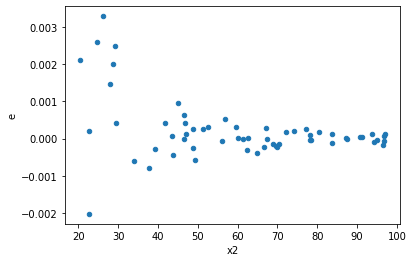

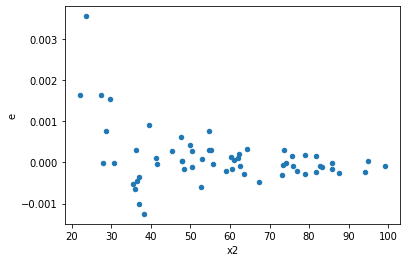

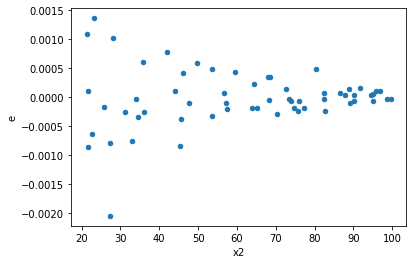

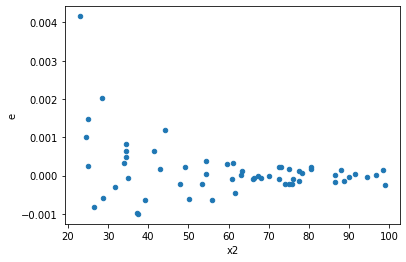

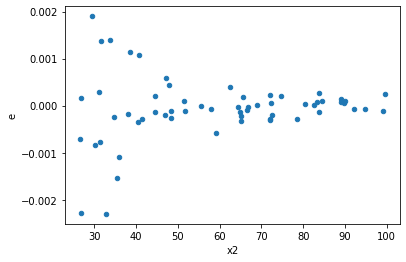

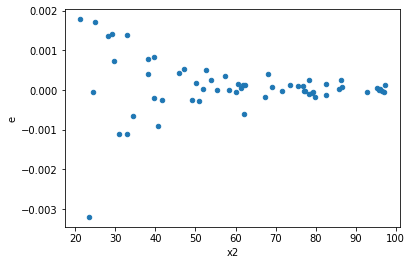

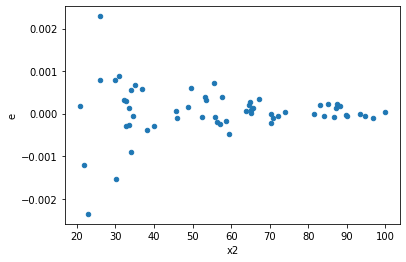

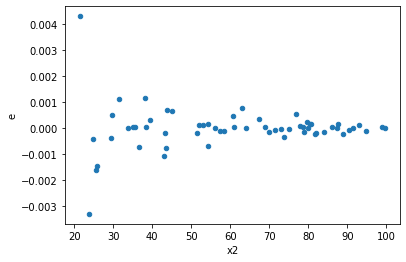

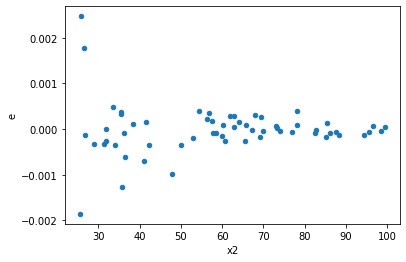

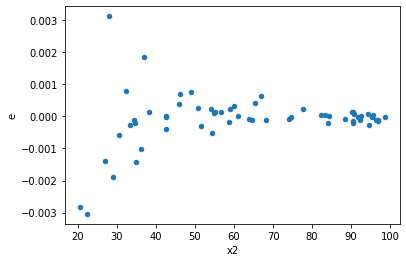

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,24.0,4.373589553698402e-06,1.74625273091637e-05,1.5619962691780006e-07,7.276053045484875e-07,4.658175687777982,0.0002796967076712509,0.9998601516461644,0.00013984835383562544,Reject001=0 : Heteroscedasticity
1.0,24.0,28.0,2.182123072826651e-06,2.1028445197053223e-05,9.092179470111046e-08,7.510158998947579e-07,8.260020629416651,4.590420301653353e-07,0.9999997704789849,2.2952101508266765e-07,Reject001=0 : Heteroscedasticity
2.0,33.0,19.0,5.0438887347630785e-06,8.708304085377631e-06,1.5284511317463874e-07,4.5833179396724375e-07,2.9986682887503253,0.013904822138503414,0.9930475889307483,0.006952411069251707,Reject001=1 : Homoscedasticity
3.0,31.0,21.0,6.876869155562806e-06,1.5947325822107536e-05,2.2183448888912278e-07,7.593964677194064e-07,3.4232570035535264,0.004592216610544764,0.9977038916947276,0.002296108305272382,Reject001=0 : Heteroscedasticity
4.0,23.0,29.0,2.126084464417289e-06,2.3905552034674008e-05,9.243845497466473e-08,8.243293805060003e-07,8.917602319639917,1.51216301924606e-07,0.999999924391849,7.5608150962303e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,31.0,1.3464034487972765e-05,2.027782007498235e-05,6.411444994272745e-07,6.541232282252371e-07,1.0202430634740784,0.93985698793424,0.53007150603288,0.46992849396712,Reject001=1 : Homoscedasticity
8.0,15.0,37.0,1.5849073448879944e-06,1.6530904776508204e-05,1.0566048965919963e-07,4.467812101758974e-07,4.228460530676682,0.0003519461781538169,0.9998240269109231,0.00017597308907690845,Reject001=0 : Heteroscedasticity
11.0,18.0,34.0,3.4616106327099907e-06,1.4010363426352665e-05,1.923117018172217e-07,4.120695125397842e-07,2.142716790741243,0.05429670618492888,0.9728516469075356,0.02714835309246444,Reject001=1 : Homoscedasticity
16.0,25.0,27.0,1.6721830958173186e-05,1.9540958358449988e-05,6.688732383269274e-07,7.237391984611107e-07,1.0820274410610615,0.8383083668738398,0.5808458165630801,0.4191541834369199,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,24.0,4.373589553698402e-06,1.74625273091637e-05,1.5619962691780006e-07,7.276053045484875e-07,4.658175687777982,0.0002796967076712509,Reject001=0 : Heteroscedasticity
1.0,24.0,28.0,2.182123072826651e-06,2.1028445197053223e-05,9.092179470111046e-08,7.510158998947579e-07,8.260020629416651,4.590420301653353e-07,Reject001=0 : Heteroscedasticity
2.0,33.0,19.0,5.0438887347630785e-06,8.708304085377631e-06,1.5284511317463874e-07,4.5833179396724375e-07,2.9986682887503253,0.013904822138503414,Reject001=1 : Homoscedasticity
3.0,31.0,21.0,6.876869155562806e-06,1.5947325822107536e-05,2.2183448888912278e-07,7.593964677194064e-07,3.4232570035535264,0.004592216610544764,Reject001=0 : Heteroscedasticity
4.0,23.0,29.0,2.126084464417289e-06,2.3905552034674008e-05,9.243845497466473e-08,8.243293805060003e-07,8.917602319639917,1.51216301924606e-07,Reject001=0 : Heteroscedasticity
5.0,24.0,28.0,2.415599565505677e-05,1.2647026065685826e-06,1.0064998189606986e-06,4.5167950234592235e-08,0.04487626265172327,4.4160504930529695e-11,Reject001=0 : Heteroscedasticity
6.0,16.0,36.0,1.3813970152414344e-05,5.643372329868774e-06,8.633731345258965e-07,1.5676034249635483e-07,0.1815673157150489,0.00065642397052145,Reject001=0 : Heteroscedasticity
7.0,21.0,31.0,1.3464034487972765e-05,2.027782007498235e-05,6.411444994272745e-07,6.541232282252371e-07,1.0202430634740784,0.93985698793424,Reject001=1 : Homoscedasticity
8.0,15.0,37.0,1.5849073448879944e-06,1.6530904776508204e-05,1.0566048965919963e-07,4.467812101758974e-07,4.228460530676682,0.0003519461781538169,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    645
Reject001=1 : Homoscedasticity      355
Name: Result_test, dtype: int64